In [1]:
import pandas as pd
# Load the dataset from the specified path
state_panels_df = pd.read_csv("E:\\680_temp3.18DID\\Table4\\combined_data_89-16.csv")
# Load another dataset and rename a column for consistency
T_df = pd.read_csv("E:/680_temp3.18DID/processed_VZ_mw_data.csv" )
T_df = T_df.rename(columns={'statefips': 'statenum'})

# Merge datasets
# Merge the above result with T_df based on 'statenum' and 'quarterdate'
df_merged = pd.merge(state_panels_df, T_df, on=["statenum", "quarterdate"], how="inner")



In [2]:

# Define feature variables (X)

X = df_merged[['HSLcountall','teencountall','HSDcountall','gendercountall','Black_or_Hispanic']]

# Handling variable (T)
# Assuming 'MW_real' represents the actual minimum wage level, we can consider its change (e.g., increase) as the treatment
# This requires some additional processing to determine which observations are after the minimum wage increase, but based on the description, we directly use 'MW_real' for illustration
# In practice, you might need to create a variable that represents the policy change
T = df_merged['T']  # Here, assuming 'MW_real' is directly used as the treatment variable, in reality, a new variable might need to be created based on changes in the minimum wage

# Outcome variable (Y)
# Assuming 'employment_rate' (employment rate) or 'emp' (number of employees) as the outcome variable
# Here, we use 'emp' as an example for the outcome variable
Y = df_merged['avewage']


In [4]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Causal Forest model
crf = CausalForestDML(model_y=GradientBoostingRegressor(), 
                      model_t=GradientBoostingRegressor(),
                      criterion='mse', n_estimators=100, 
                      min_samples_leaf=10, 
                      max_depth=None)

# Assuming X, T, Y are already prepared and in the correct format
# Fit the model
# Note: The call to the fit method must adhere to the requirements of your version of econml, the following is applicable in most cases
crf.fit(Y, T, X=X, W=None, inference='auto')

# Estimate causal effects
treatment_effects = crf.effect(X)


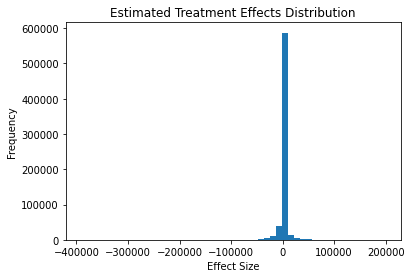

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of estimated treatment effects
plt.hist(treatment_effects, bins=50)
plt.title('Estimated Treatment Effects Distribution')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')
plt.show()

# Get confidence intervals
te_lower, te_upper = crf.effect_interval(X, alpha=0.05)


In [6]:

# Calculate feature importances
feature_importances = crf.feature_importances_

# Print feature importances
feature_names = ['HSLcountall','teencountall','HSDcountall','gendercountall','Black_or_Hispanic']
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")


HSLcountall: 0.17338096892282462
teencountall: 0.16552640478921346
HSDcountall: 0.18297213069941945
gendercountall: 0.2044431856854745
Black_or_Hispanic: 0.273677309903068


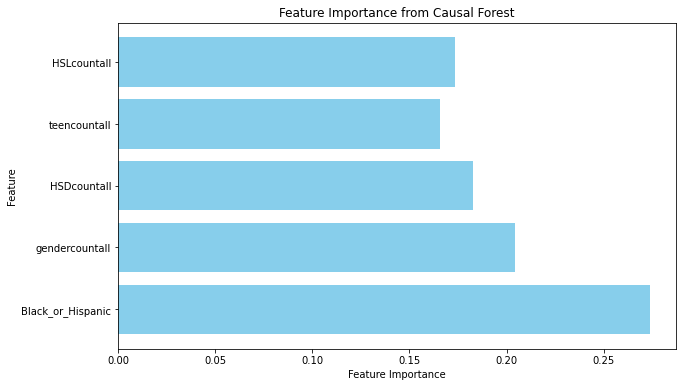

In [7]:
import matplotlib.pyplot as plt

# Assuming feature_importances are the feature importance scores obtained from the model
feature_importances = crf.feature_importances_

# Feature names
feature_names = ['HSLcountall','teencountall','HSDcountall','gendercountall','Black_or_Hispanic']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Causal Forest')
plt.gca().invert_yaxis()  # Invert the y-axis so the most important feature appears on top
plt.show()
